In [19]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
warnings.filterwarnings("ignore")

## Get The data

In [3]:
columns = ["user_id", "item_id", "rating", "timestamp"]
df = pd.read_csv("ml-100k/u.data", sep = "\t", names=columns)
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


## Getting the movie titles

In [13]:
movie_titles = pd.read_csv("ml-100k/u.item", sep = "\|", header = None, encoding = "ISO-8859-1")
movie_titles.head()

,0,1
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [15]:
#We only need the 1st two columns
movie_titles = movie_titles[[0,1]]
#The first two columns correspond to item_id and title respectively
movie_titles.columns = ['item_id', 'title']
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [17]:
#Now we merge these two columns to the original DataFrame
df = pd.merge(df, movie_titles, on = "item_id")
df.head()

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


## Data Analysis

In [20]:
#Checking the average rating of the movies (A movie is rated out of 5 points/stars)
df.groupby('title').mean()['rating'].sort_values(ascending=False).head()

title
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: rating, dtype: float64

In [22]:
#An average rating of 5 isn't actually a good movie and can't be recommended to an user
#A good movie will always have more no of ratings and it's impossible for all users to give a 5 star rating
#Checking the no. of people who have rated a movie

df.groupby('title')['rating'].count()

title
'Til There Was You (1997)                  9
1-900 (1994)                               5
101 Dalmatians (1996)                    109
12 Angry Men (1957)                      125
187 (1997)                                41
                                        ... 
Young Guns II (1990)                      44
Young Poisoner's Handbook, The (1995)     41
Zeus and Roxanne (1997)                    6
unknown                                    9
Á köldum klaka (Cold Fever) (1994)         1
Name: rating, Length: 1664, dtype: int64

In [23]:
# As we can see some movies have very few viewers who have given a rating

In [24]:
ratings = pd.DataFrame(df.groupby('title').mean()['rating'])
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [25]:
ratings['viewers'] = pd.DataFrame(df.groupby('title').count()['rating'])
ratings.head()

,rating,viewers
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


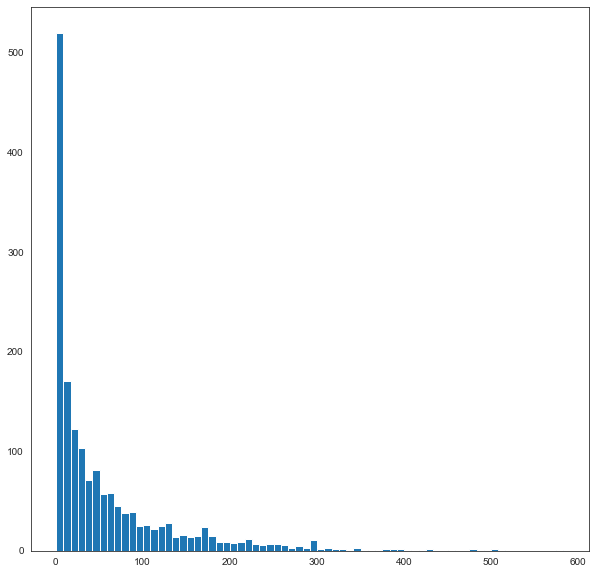

In [28]:
#Visualizing the relationship between no. of viewers and average rating
plt.figure(figsize=(10,10))
plt.hist(ratings['viewers'], bins = 70)
plt.show()

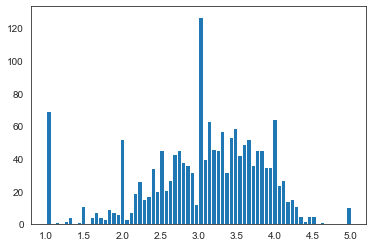

In [32]:
#The histogram also shows that there are a lot of movies which have lesser no of viewers and such movies' ratings aren't relevant
plt.hist(ratings['rating'], bins = 70)
plt.show()

In [34]:
#The average rating histogram is normally distributed

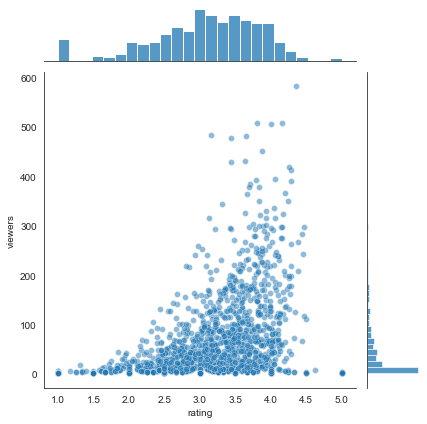

In [36]:
#Plotting a jointplot to see the relationship between no.of viewers and average rating
sns.jointplot(x = "rating", y ="viewers", data=ratings, alpha = 0.5)

In [37]:
#The jointplot shows that the movies having a good average also have a higher number of viewers. But there are a few outliers as well


## Building the recommendation model

In [38]:
#Building a matrix corresponding to the user and their rating for a particular movie
#If a user has not given any rating to a movie, we denote the cell as NaN (Not a Number)
mat = df.pivot_table(index = "user_id", columns="title", values="rating")
mat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [89]:
def predict(name):
    #Calculating correlation
    user_ratings = mat[name]
    similar_movies = mat.corrwith(user_ratings)
    
    corr_movie = pd.DataFrame(similar_movies, columns = ['Correlation'])
    corr_movie.dropna(inplace=True)
    corr_movie = corr_movie.join(ratings['viewers'])
    
    recommended_movies = corr_movie[corr_movie['viewers'] > 100].sort_values('Correlation',ascending=False)
    recommended_movies = recommended_movies[recommended_movies['Correlation'] > 0.5]
    return recommended_movies

In [90]:
predict(input("Enter movie name"))

Enter movie nameYoung Guns (1988)


,Correlation,viewers
title,,
Young Guns (1988),1.000000,101
Good Will Hunting (1997),0.675082,198
"River Wild, The (1994)",0.662424,146
"Frighteners, The (1996)",0.629871,115
Seven Years in Tibet (1997),0.599263,155
"Time to Kill, A (1996)",0.597969,232
"Ghost and the Darkness, The (1996)",0.585139,128
"Nightmare on Elm Street, A (1984)",0.578651,111
"First Wives Club, The (1996)",0.569725,160
